# Jaringan Saraf Tiruan (Backpropagation Neural Network)

**Nama  : Shohibun Naufal**

**NIM   : 210411100013**

**Kelas : Penambangan Data-C**

Backpropagation Neural Network (jaringan saraf tiruan) pada dasarnya adalah algoritma machine learning yang digunakan untuk melatih model neural network dengan menggunakan data input-output yang telah diketahui. Algoritma backpropagation beroperasi dengan cara mengalirkan input melalui lapisan-lapisan neuron (neural network) untuk menghasilkan output, kemudian menghitung error atau kesalahan prediksi antara output yang dihasilkan oleh model dan output yang sebenarnya.

Setelah itu, algoritma akan melakukan proses "backpropagation" atau mengalirkan kembali error tersebut dari output menuju lapisan input dengan tujuan memperbarui bobot (weight) dan bias pada setiap neuron yang ada di dalam model. Proses ini dilakukan dengan menggunakan metode gradient descent untuk menemukan nilai bobot dan bias yang optimal untuk meminimalkan error prediksi.

Dengan mengulang proses ini secara iteratif pada setiap data input-output yang ada dalam dataset, model neural network akan terus memperbaiki performa prediksi hingga mencapai titik konvergensi atau nilai error yang optimal. Model yang telah dilatih dengan algoritma backpropagation ini dapat digunakan untuk melakukan prediksi pada data input yang belum pernah dilihat sebelumnya.

1. Mengimport library yang diperlukan

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pickle

2. Import data kita

In [14]:
df = pd.read_csv('https://gist.githubusercontent.com/shohibunnaufal/d3516ed009a4ab1dcc5c2fa2a378d02c/raw/2140f62dfd210658868e79e56a18c66a381520f2/IrisDataSet')

jumlah_baris = df.shape[0]
df.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,setosa
1,?,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


3. Mengecek nilai yang hilang/kosong pada data

In [15]:
df_copy = df.copy()
df_copy.isnull().sum()

sepal_length    1
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

4. Mengganti nilai yang mengandung tanda tanya (?) menjadi nilai kosong

In [16]:
df_copy = df_copy.replace('?',np.nan)

5. Mengecek lagi berapa nilai yang kosong pada data

In [17]:
df_copy.isnull().sum()

sepal_length    2
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

6. Setelah itu kita lihat type data pada fitur, jika type datanya bukan numerik/float maka perlu diganti type datanya

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    object 
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


7. Memisahkan fitur dan target

In [19]:
# Get features and target
X = df_copy[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_copy['species']

8. Membagi dataset menjadi data training dan data testing (0.8/0.2)

In [8]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

9. Untuk melatih jaringan MLP, data harus selalu diskalakan karena sangat sensitif terhadapnya.

In [20]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

10. Membuat objek MLPClassifier dari scikit-learn untuk membangun model neural network. MLP merupakan singkatan dari Multi-Layer Perceptron, yaitu salah satu jenis arsitektur neural network yang paling populer.

In [21]:
# Membuat objek imputer dengan strategi imputasi rata-rata
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai yang hilang pada data input
X_train_filled = imputer.fit_transform(X_train_scaled)

# Melatih model dengan data yang telah diisi dengan nilai yang hilang
mlp_clf.fit(X_train_filled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 100, 50),
              max_iter=300, random_state=42)

11. Melakukan prediksi pada data test `X_test_scaled` dengan menggunakan model yang telah ditraining sebelumnya (mlp_clf) menggunakan method predict dan hasil prediksi disimpan pada variabel `y_pred`.

In [ ]:
y_pred = mlp_clf.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 1.00


12. Menampilkan visualisasi matriks konfusi sebagai peta panas

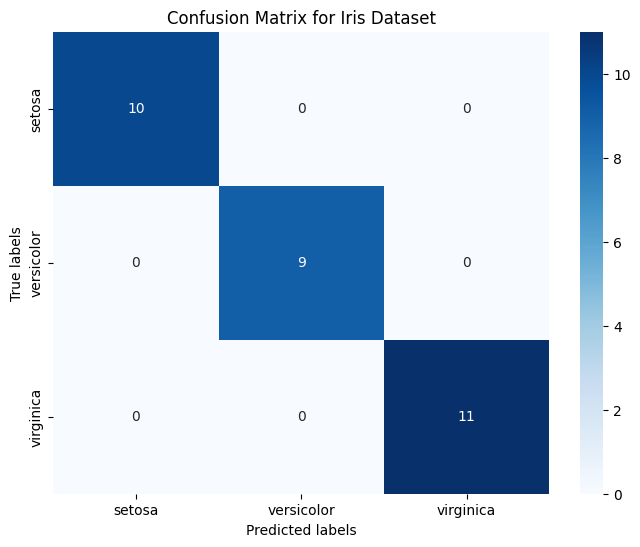

In [25]:
# Menghasilkan prediksi menggunakan model
y_pred = mlp_clf.predict(X_test_scaled)

# Membuat matriks kebingungan (confusion matrix)
cm = confusion_matrix(y_test, y_pred)

# Menampilkan heatmap matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=mlp_clf.classes_, yticklabels=mlp_clf.classes_)
plt.title('Confusion Matrix for Iris Dataset')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


13. Menampilkan laporan klasifikasi yang berisi berbagai metrik evaluasi kinerja model klasifikasi.

> Hasil yang ditampilkan adalah laporan klasifikasi untuk model klasifikasi yang memiliki akurasi 100% pada data uji. Laporan ini menunjukkan bahwa model berhasil memprediksi dengan sempurna semua sampel pada setiap kelas (setosa, versicolor, dan virginica) dengan precision, recall, dan f1-score sebesar 1.00.



In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



14. Menampilkan kurva kerugian dari model yang dilatih. 

> Plot ini menunjukkan bagaimana kerugian model berubah seiring dengan meningkatnya jumlah iterasi atau epoch pada pelatihan model.

> Kurva kerugian ini dapat memberikan informasi yang berguna tentang bagaimana model belajar selama pelatihan dan apakah model terlalu kompleks atau tidak cukup kompleks. Misalnya, jika kerugian terus menurun selama pelatihan, ini menunjukkan bahwa model belajar dengan baik dan dapat menyesuaikan diri dengan data pelatihan. Namun, jika kerugian tetap tinggi atau tidak menurun seiring waktu, ini mungkin menunjukkan bahwa model terlalu kompleks atau tidak cocok dengan data.


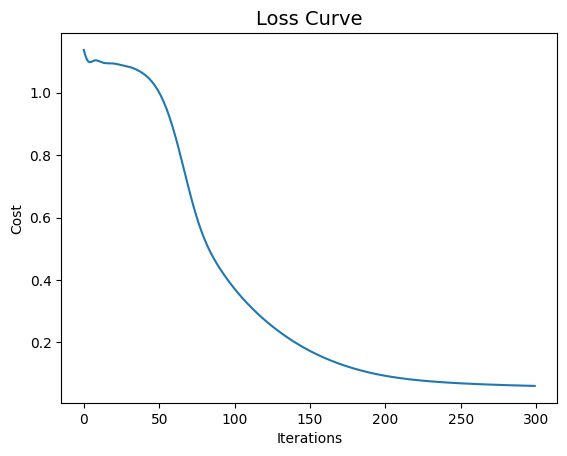

In [27]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

15. Menyimpan dan memuat model klasifikasi MLPClassifier yang telah dilatih menggunakan pustaka pickle. pickle.dump() digunakan untuk menyimpan model ke dalam file yang diberikan dengan format biner, sedangkan pickle.load() digunakan untuk memuat model dari file yang disimpan sebelumnya.

In [28]:
# Menyimpan model ke file
with open('mlp_clf_model.pkl', 'wb') as file:
    pickle.dump(mlp_clf, file)

# Memuat/load model dari file
with open('mlp_clf_model.pkl', 'rb') as file:
    mlp_clf_loaded = pickle.load(file)

# Menggunakan model untuk melakukan prediksi pada data baru
y_pred = mlp_clf_loaded.predict(X_test_scaled)

16. Melakukan prediksi menggunakan model klasifikasi MLPClassifier pada data baru yang belum pernah dilihat sebelumnya.

In [29]:
# Buat data baru
new_data = np.array([[6.2,	3.4,	5.4,	2.3]])

# Scaling data baru menggunakan skalar yang telah dilatih sebelumnya
new_data_scaled = scaler.transform(new_data)

# Menggunakan model untuk melakukan prediksi pada data baru
y_pred = mlp_clf_loaded.predict(new_data_scaled)
print(y_pred)

['virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
